In [41]:
import requests
from bs4 import BeautifulSoup
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import seaborn as sns
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt


import statsmodels.api as sm
import patsy as pt
import sklearn.linear_model as lm

In [42]:
df_2017=pd.read_excel('pypl2017.xlsx')
df_2018=pd.read_excel('pypl2018.xlsx')
df_2019=pd.read_excel('pypl2019.xlsx')

In [43]:
df_2017.drop(['Rank', 'Trend'], inplace=True, axis=1)
df_2017.set_index('Language', inplace=True)
df_2017.rename(columns={'Share':'2017'}, inplace=True)
df_2017.head()

,2017
Language,
Python,18.6 %
Java,21.4 %
Javascript,8.0 %
C#,7.6 %
PHP,8.2 %


In [44]:
df_2018.drop(['Rank', 'Trend'], inplace=True, axis=1)
df_2018.set_index('Language', inplace=True)
df_2018.rename(columns={'Share':'2018'}, inplace=True)
df_2018.head()

,2018
Language,
Python,24.58 %
Java,22.14 %
Javascript,8.41 %
C#,7.74 %
PHP,7.77 %


In [45]:
df_2019.drop(['Rank', 'Trend'], inplace=True, axis=1)
df_2019.set_index('Language', inplace=True)
df_2019.rename(columns={'Share':'2019'}, inplace=True)
df_2019.head()

,2019
Language,
Python,28.08 %
Java,20.51 %
Javascript,8.29 %
C#,7.41 %
PHP,6.96 %


In [46]:
df_2017=df_2017.replace('\%','',regex=True).astype(float)
df_2018=df_2018.replace('\%','',regex=True).astype(float)
df_2019=df_2019.replace('\%','',regex=True).astype(float)

In [47]:
df_2017.index.name='Language'
df_2018.index.name='Language'
df_2019.index.name='Language'

In [48]:
df=pd.merge(df_2017, df_2018, on='Language', how='outer')
df

,2017,2018
Language,,
Python,18.6,24.58
Java,21.4,22.14
Javascript,8.0,8.41
C#,7.6,7.74
PHP,8.2,7.77
C/C++,6.3,6.22
R,3.8,4.04
Objective-C,3.9,3.33
Swift,3.1,2.65


In [49]:
df=pd.merge(df, df_2019, on='Language', how='outer')
df

,2017,2018,2019
Language,,,
Python,18.6,24.58,28.08
Java,21.4,22.14,20.51
Javascript,8.0,8.41,8.29
C#,7.6,7.74,7.41
PHP,8.2,7.77,6.96
C/C++,6.3,6.22,5.76
R,3.8,4.04,4.15
Objective-C,3.9,3.33,2.82
Swift,3.1,2.65,2.36


In [50]:
x = df.iloc[:, :-1]

# y = target values, last column of the data frame
y = df.iloc[:, -1]


skm = lm.LinearRegression()
# запускаем расчет параметров для указанных данных
skm.fit(x, y)
# и выведем параметры рассчитанной модели

print(skm.predict(x))

[28.01445345 20.80032252  8.14166561  7.28067391  6.76149582  5.70348949
  4.05040547  2.63605431  2.13975226  1.98068744  1.76294933  1.4725434
  1.31643908  1.51856675  1.26368679  1.32316802  1.10031686  0.72216933
  0.51116016]


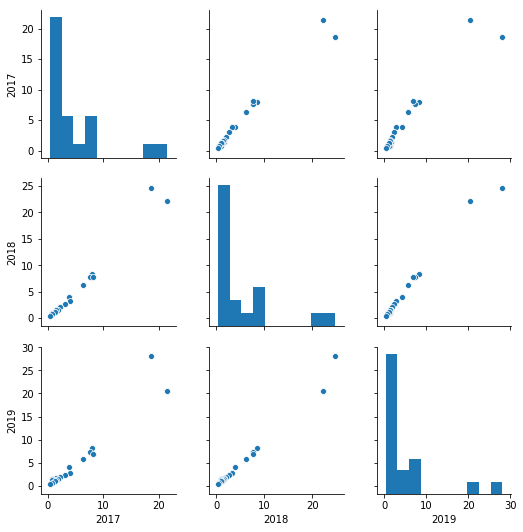

In [51]:
sns.pairplot(df)